<a href="https://colab.research.google.com/github/Lifearoundhere/Experiments-with-Pytorch/blob/master/PyTorchVision_FeedForwardNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
pip install torchvision matplotlib


In [0]:
import torch
import torchvision
from torchvision import transforms, datasets


* Using torchs inbuild data (mnist)

### Neural Network Input ####

In [8]:
train = datasets.MNIST("", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 27829968.31it/s]                            


Extracting MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 441712.85it/s]
0it [00:00, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 7191350.44it/s]                            
8192it [00:00, 179303.44it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


* Test data should normally always be out of sample data

In [0]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

*   batch is needed due to dataset size
*   Go for the biggest batch size you can get away with to help with training times
*   shuffle helps with generalisation (obfuscate overfit)




In [11]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

* get first sample to review tensor

In [17]:
x, y = data[0][0], data[1][0]
print( y)

tensor(3)


* x is the image tensor, y is the result tensor


torch.Size([1, 28, 28])


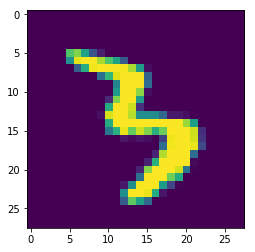

In [21]:
import matplotlib.pyplot as plt
print(x.shape)
plt.imshow(x.view(28,28))
plt.show() 

* the Tensor delivers a three-dimensional object however and the image has only two. This need to be accounted for e.g
```
view(28,28)
```



### Checking for data balence ### 

In [26]:
total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,}

for data in trainset:
  xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
    total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [27]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


* The percentage distribution of the images above


### Creating a Neural Network


In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [31]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    return F.log_softmax(x, dim = 1)


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


```__init__```
* When you initialise nn you inherit the method &  except the initialise method (```__init__```) 
* so you need to run initialise method if you need to ```super().__init__``` 

```fc1```

* input is 784 because it the *flattened image* 28 x 28 = 784
* output is 64 just because


```fc4```
* output is 10 because our data/images is the numbers 0 - 9

```forward```
* defines how our data will feed through the network

```F.relu```
* the activation function
* This is if the neuron is firing or not (its a sigmoid)

```F.log_softmax```
* this returns the prob distbution etc [0, 0.22, 0.88]
* dim is dimention (its like axis's) 
 

In [32]:
X = torch.rand((28,28))
X = X.view(-1, 28*28)
output = net(X)
print(output)


tensor([[-2.2205, -2.2528, -2.4362, -2.3762, -2.3739, -2.3416, -2.2573, -2.3585,
         -2.1956, -2.2427]], grad_fn=<LogSoftmaxBackward>)


* Above is an example of inputting and outputting on of the nn
* returns an array of probabilities 

### Training the Neural Network


* need to deal with loss
* need to do optimisations (adjust weight over time based on the learning rate used)

In [33]:
import torch.optim as optim

optimiser = optim.Adam(net.parameters(), lr=0.001)

# interate through the data and do that interation multiples time

EPOCHS = 3

for epoch in range(EPOCHS):
  for data in trainset:
    # data is a batch (10) of featuresets and labels
    x, y = data
    net.zero_grad()
    output = net(x.view(-1, 28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimiser.step()
  print(loss)


tensor(0.2791, grad_fn=<NllLossBackward>)
tensor(0.0439, grad_fn=<NllLossBackward>)
tensor(0.0195, grad_fn=<NllLossBackward>)


```net.parameters()```
* is everything that is adjustable in the model

```lr```
* the learning rate
* sets the steps
* most real problems decay the learning rate
* we dont optimise for accucacy we optimise for loss (it just happens that accycacy follows loss) 

```EPOCH```
* one full pass through the data

```net.zero_grad```
* sets gradients to 0 before loss calc. You will do this likely every step.

```F.nll_loss(output, y)```
* calc and grab the loss value

```loss.backward```
* apply this loss backwards thru the network's parameters

```optimizer.step()```
* attempt to optimize weights to account for loss/gradients
  

In [44]:
correct = 0
total = 0

with torch.no_grad():
  for data in testset:
    x, y = data
    output = net(x.view(-1, 28*28))
    for index, i in enumerate(output):
      if torch.argmax(i) == y[index]:
        correct += 1
      total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.967


### Test NN

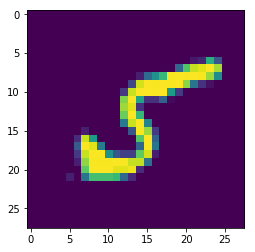

In [41]:
# change sample to test recogistion 
sample = 1
plt.imshow(x[sample].view(28,28))
plt.show()

In [42]:
print(torch.argmax(net(x[sample].view(-1,784))[0]))

tensor(5)
